In [37]:
import pandas as pd

data = pd.read_csv('housing.csv')

print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [39]:
# Podstawowe informacje o danych
print(data.info())

# Podstawowe statystyki opisowe
print(data.describe())

# Sprawdź brakujące wartości
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

In [41]:
# Usunięcie wierszy z brakującymi danymi w kolumnie 'total_bedrooms'
data_cleaned = data.dropna(subset=['total_bedrooms'])

# Sprawdzenie nowej ilości rekordów
new_count = data_cleaned.shape
new_count

(20433, 10)

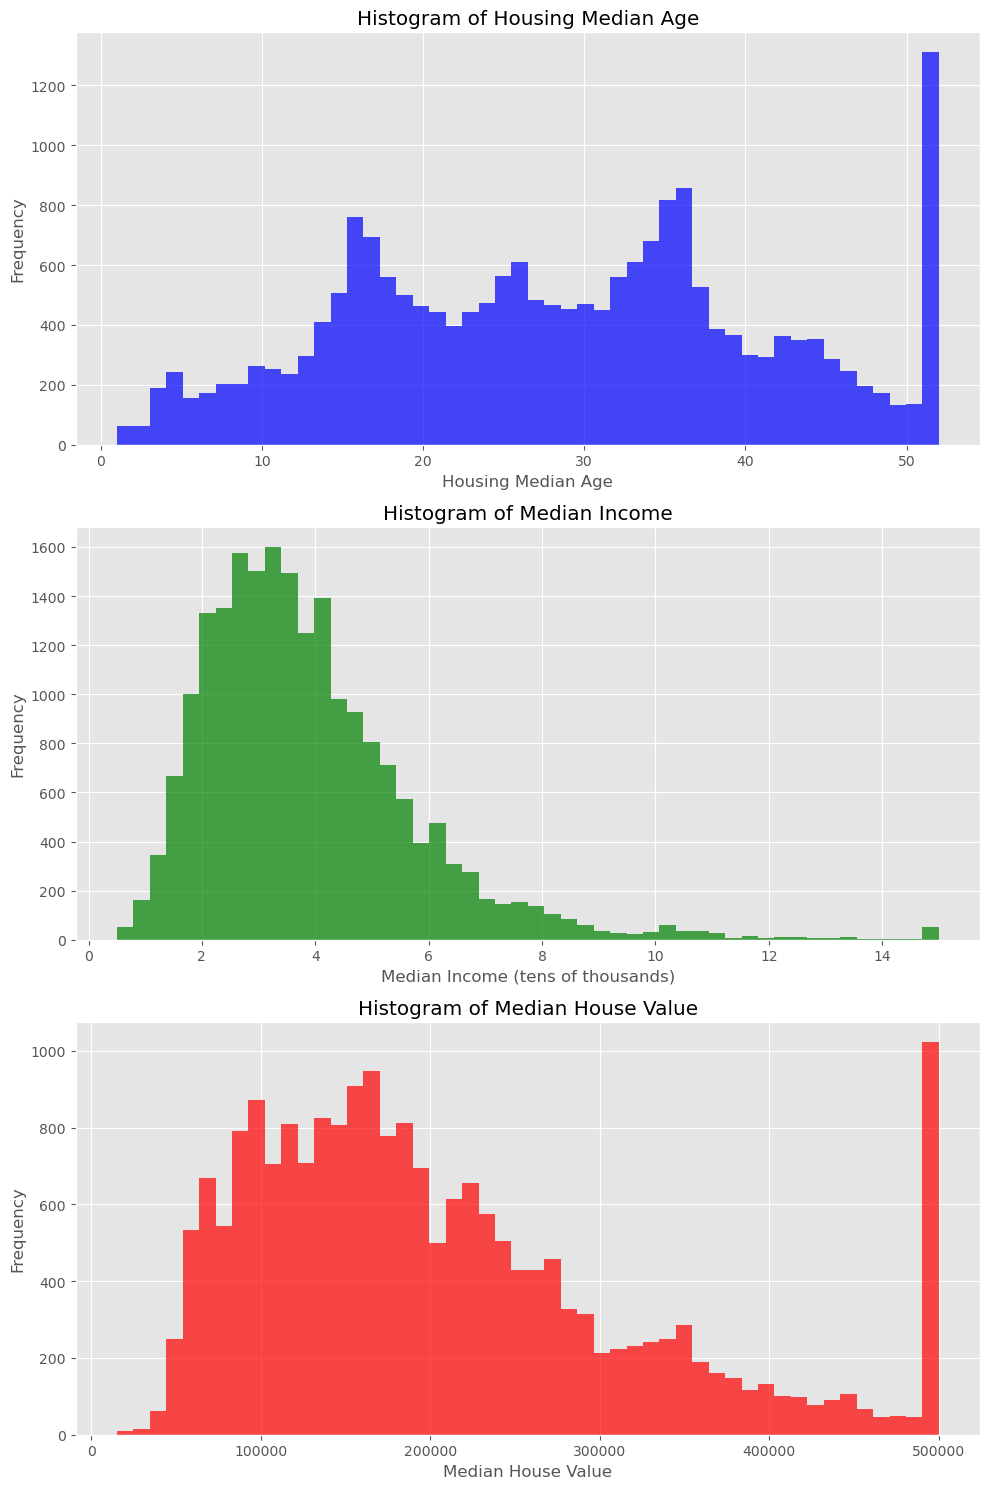

In [43]:
import matplotlib.pyplot as plt

# Ustawienie stylu wykresów
plt.style.use('ggplot')

# Utworzenie histogramów dla kluczowych cech
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Histogram wieku domów
axs[0].hist(data_cleaned['housing_median_age'], bins=50, color='blue', alpha=0.7)
axs[0].set_title('Histogram of Housing Median Age')
axs[0].set_xlabel('Housing Median Age')
axs[0].set_ylabel('Frequency')

# Histogram dochodu mediany
axs[1].hist(data_cleaned['median_income'], bins=50, color='green', alpha=0.7)
axs[1].set_title('Histogram of Median Income')
axs[1].set_xlabel('Median Income (tens of thousands)')
axs[1].set_ylabel('Frequency')

# Histogram wartości mediany domów
axs[2].hist(data_cleaned['median_house_value'], bins=50, color='red', alpha=0.7)
axs[2].set_title('Histogram of Median House Value')
axs[2].set_xlabel('Median House Value')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Wiek Mieszkań (Housing Median Age): Rozkład wieku mieszkań pokazuje, że wiele z nich skupia się wokół większych wartości, co wskazuje na starszą zabudowę.
# Dochód Mediany (Median Income): Dochody są skupione głównie w dolnych przedziałach, co wskazuje na dominację mieszkańców o niższych zarobkach, z mniejszymi szczytami w wyższych przedziałach dochodowych.
# Wartość Mediany Domów (Median House Value): Wartości domów mają szeroki rozkład, z wyraźnym skupieniem w niższych przedziałach cenowych, co może odzwierciedlać większy udział przystępnych cenowo nieruchomości.

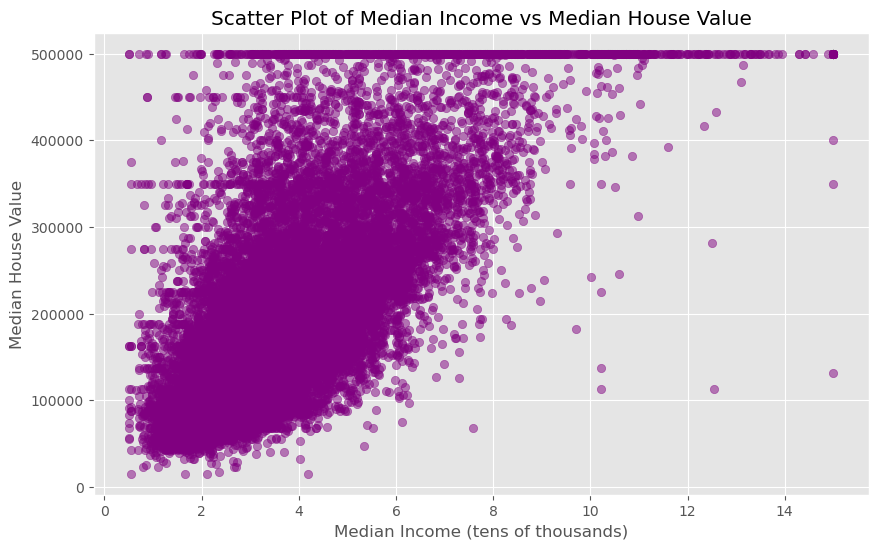

In [45]:
# Wykres rozrzutu dla dochodu mediany vs wartości mediany domów
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['median_income'], data_cleaned['median_house_value'], alpha=0.5, color='purple')
plt.title('Scatter Plot of Median Income vs Median House Value')
plt.xlabel('Median Income (tens of thousands)')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

# Wykres Rozrzutu - Dochód Mediany vs Wartość Mediany Domów:

# Wykres pokazuje pozytywną korelację między dochodem a wartością domów, co wskazuje, że wyższe dochody mogą sprzyjać zdolności do zakupu droższych domów.

<Figure size 1200x800 with 0 Axes>

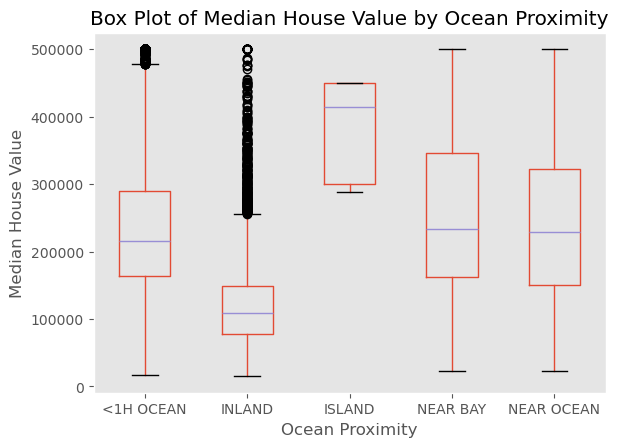

In [47]:
# Wykres pudełkowy dla wartości mediany domów w zależności od bliskości do oceanu
plt.figure(figsize=(12, 8))
data_cleaned.boxplot(column='median_house_value', by='ocean_proximity', grid=False)
plt.title('Box Plot of Median House Value by Ocean Proximity')
plt.suptitle('')  # Usuwa domyślny tytuł dodawany przez pandas
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

# Wykres Pudełkowy - Wartość Mediany Domów w Zależności od Bliskości do Oceanu:

# Wykres ukazuje, że lokalizacje bliżej oceanu mają ogólnie wyższe mediany wartości domów, co sugeruje premium za bliskość do wody.

In [49]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# One-Hot Encoding dla zmiennej kategorycznej 'ocean_proximity'
encoder = OneHotEncoder()
ocean_proximity_encoded = encoder.fit_transform(data_cleaned[['ocean_proximity']]).toarray()
ocean_proximity_encoded_df = pd.DataFrame(ocean_proximity_encoded, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Połączenie zakodowanej zmiennej z resztą danych
data_prepared = pd.concat([data_cleaned.reset_index(drop=True), ocean_proximity_encoded_df], axis=1)

# Usunięcie oryginalnej kolumny 'ocean_proximity'
data_prepared.drop('ocean_proximity', axis=1, inplace=True)

# Skalowanie cech liczbowych
scaler = StandardScaler()
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
data_prepared[numerical_features] = scaler.fit_transform(data_prepared[numerical_features])

# Podział danych na zestawy uczące i testowe
X = data_prepared.drop('median_house_value', axis=1)
y = data_prepared['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data_prepared.head(), X_train.shape, X_test.shape

(   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0  -1.327314  1.051717            0.982163    -0.803813       -0.970325   
 1  -1.322323  1.042355           -0.606210     2.042130        1.348276   
 2  -1.332305  1.037674            1.855769    -0.535189       -0.825561   
 3  -1.337296  1.037674            1.855769    -0.623510       -0.718768   
 4  -1.337296  1.037674            1.855769    -0.461970       -0.611974   
 
    population  households  median_income  median_house_value  \
 0   -0.973320   -0.976833       2.345163            452600.0   
 1    0.861339    1.670373       2.332632            358500.0   
 2   -0.819769   -0.843427       1.782939            352100.0   
 3   -0.765056   -0.733562       0.932970            341300.0   
 4   -0.758879   -0.628930      -0.013143            342200.0   
 
    ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
 0                        0.0                     0.0                

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inicjalizacja modelu regresji liniowej
model = LinearRegression()

# Trenowanie modelu na zestawie uczącym
model.fit(X_train, y_train)

# Predykcje na zestawie testowym
y_pred = model.predict(X_test)

# Obliczenie metryk oceny
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

# Interpretacja Wyników:
# Błąd średniokwadratowy: Wartość MSE jest dość wysoka, co sugeruje, że przewidywane wartości mogą być dość odległe od rzeczywistych wartości.
# R² Score: Wartość 0.625 oznacza, że model wyjaśnia około 62.5% wariancji w danych testowych. To przyzwoity wynik, ale jest miejsce na poprawę.

(4802173538.604158, 0.6488402154431994)

In [57]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Lasy Losowe
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_pred)
forest_r2 = r2_score(y_test, forest_pred)

forest_mse, forest_r2

# Random Forest Regression: Ten model znacząco poprawił wyniki, obniżając MSE do około 2.4 miliarda i zwiększając R² Score do 0.816.

(2401258264.8133707, 0.824407567082176)